In [63]:
from __future__ import print_function

import nltk
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from time import time
from sklearn import metrics

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.naive_bayes import BernoulliNB, MultinomialNB

from sklearn.utils.extmath import density

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import ngrams

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s %(message)s')

In [76]:
# Benchmark function used to compare classifiers
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(x_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(x_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        if names is not None:
            print("top 7 keywords:")
            for i, label in enumerate(categories):
            #for i, label in enumerate(labels):
                top10 = np.argsort(clf.coef_[i])[-7:]
                print(trim("%s: %s" % (label, " ".join(names[top10]))))
        print()

    print("classification report:")
    print(metrics.classification_report(y_test, pred, target_names=labels))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

# Validation curve helper function
def plot_validation_curve(estimator, title, X, y, param, n_jobs=1, param_range=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param, param_range=param_range,
        cv=10, scoring="accuracy", n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param)
    plt.ylabel("Score")
    plt.ylim(0.5, 1.02)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    
#Learning curve helper function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    
def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

In [110]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

remove = ('headers', 'footers', 'quotes')

print("Loading 20 newsgroups dataset for categories:")
print(categories if categories else "all")

data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=remove)

data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,
                               remove=remove)
print('data loaded')

stop = set(stopwords.words('english'))
#ngrams = (1, 2)

x_vectorized = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words=stop)
x_vectorized.fit(data_train.data)
x_train = x_vectorized.transform(data_train.data)
y_train = data_train.target

names = np.asarray(x_vectorized.get_feature_names())

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.4, random_state=39)

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
data loaded


In [ ]:
# Define default labels
labels = ['Fatos', 'Normas', 'Argumentos', 'Pedidos', 'Irrelevante']

# Define stopwords list
stop = []

raw_data = pd.read_csv('C:\Users\pedro.castanha\Downloads\ML_Gabinete_Digital.csv', error_bad_lines=False, sep='\t', encoding='utf_8')
#words = pd.read_table('C:\Users\pedro.castanha\Downloads\stoplists\stopwords_pt_br.txt', encoding='mbcs')
#words = pd.read_table('C:\Users\pedro.castanha\Downloads\stoplists\stopwords_pt_br_v2.txt', encoding='mbcs')
#words = pd.read_table('C:\Users\pedro.castanha\Downloads\stoplists\stopwords_pt_br_v3.txt', encoding='mbcs')

# Changing all words to lowercase
raw_data.Text = raw_data.Text.apply(lambda x: x.lower())

#stopwords = words.values.T.tolist()[0]
stop = set(stopwords.words('portuguese'))
#ngrams = (1, 2)

x_vectorized = TfidfVectorizer(sublinear_tf=True, max_df=0.6, stop_words=stop)
x_vectorized.fit(raw_data.Text)
x_train = x_vectorized.transform(raw_data.Text)
y_train = raw_data.Class

names = np.asarray(x_vectorized.get_feature_names())

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

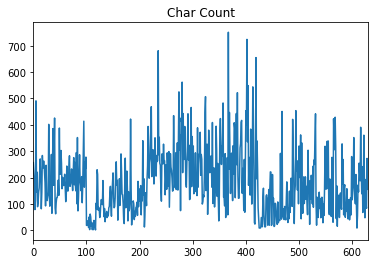

Highest: 751
Lowest : 2



In [99]:
# Create list of text sizes
size = [len(x) for x in raw_data.Text]
#chart = zip(range(len(size)), size)

# Create dataframe and plot line chart of str sizes
df = pd.Series(data=size, index=range(len(size)))
df.plot(title="Char Count")
plt.show()

print('Highest: %d\nLowest : %d\n' % (df.max(), df.min()))

In [100]:
# Generate parameters with logarithmic scale
#alpha_list = np.logspace(-5,0,num=100)
alpha_list = np.logspace(-2,0,num=100)
tuned_parameters = [{'alpha': alpha_list}]

bnb = BernoulliNB()
mnb = MultinomialNB()

scores = ['precision', 'recall']
values = [('precision', mnb), ('recall', mnb), ('precision', bnb), ('recall', bnb)]

for score, classifier in values:
    print("# Tuning parameters for %s" % score)
    print()
    
    clf = GridSearchCV(classifier, tuned_parameters, cv=5, scoring='%s_macro' % score)
    clf.fit(x_train, y_train)

    print("Best parameters found:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Classification report:")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(metrics.classification_report(y_true, y_pred, target_names=labels))
    print()

# Tuning parameters for precision

Best parameters found:

{'alpha': 0.061359072734131756}

Grid scores:

0.828 (+/-0.060) for {'alpha': 0.01}
0.829 (+/-0.058) for {'alpha': 0.010476157527896646}
0.830 (+/-0.060) for {'alpha': 0.010974987654930561}
0.832 (+/-0.060) for {'alpha': 0.011497569953977356}
0.835 (+/-0.056) for {'alpha': 0.012045035402587823}
0.836 (+/-0.055) for {'alpha': 0.012618568830660204}
0.835 (+/-0.053) for {'alpha': 0.013219411484660288}
0.835 (+/-0.053) for {'alpha': 0.013848863713938732}
0.835 (+/-0.053) for {'alpha': 0.014508287784959394}
0.834 (+/-0.052) for {'alpha': 0.015199110829529339}
0.833 (+/-0.048) for {'alpha': 0.015922827933410922}
0.833 (+/-0.048) for {'alpha': 0.016681005372000592}
0.835 (+/-0.049) for {'alpha': 0.017475284000076838}
0.833 (+/-0.048) for {'alpha': 0.01830738280295368}
0.832 (+/-0.052) for {'alpha': 0.019179102616724886}
0.831 (+/-0.051) for {'alpha': 0.02009233002565047}
0.835 (+/-0.056) for {'alpha': 0.021049041445120209}
0.835 (+/-0

Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.0126185688307, class_prior=None, fit_prior=True)
train time: 0.005s
test time:  0.001s
accuracy:   0.838
top 7 keywords:
alt.atheism: religion would think say people one god
talk.religion.misc: image know anyone would files thanks graphics
comp.graphics: launch orbit like one would nasa space
sci.space: see one christians would people jesus god

classification report:
             precision    recall  f1-score   support

      Fatos       0.78      0.82      0.80       199
     Normas       0.93      0.91      0.92       230
 Argumentos       0.82      0.91      0.86       221
    Pedidos       0.80      0.65      0.72       164

avg / total       0.84      0.84      0.84       814

confusion matrix:
[[164   0  12  23]
 [  2 209  19   0]
 [  8   7 202   4]
 [ 35   8  14 107]]

________________________________________________________________________________
Train

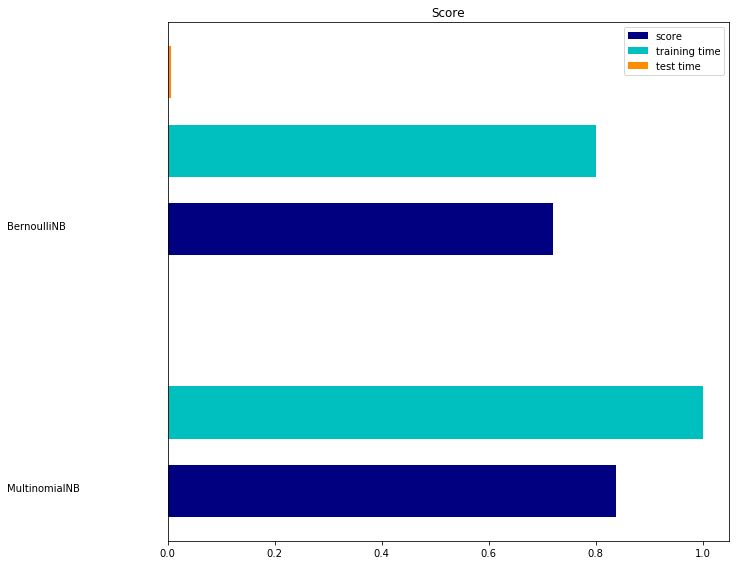

In [111]:
results = []

# Naive Bayes comparison
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=0.012618568830660204)))
results.append(benchmark(BernoulliNB(alpha=0.055908101825122229)))

# Bar chart plot with comparison results
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
#test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

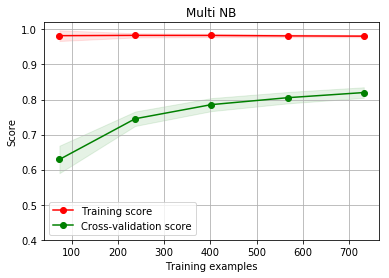

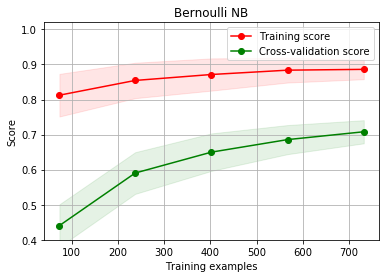

In [112]:
# Learning Curve call
title = "Multi NB"
title_2 = "Bernoulli NB"
cv = ShuffleSplit(n_splits=100, test_size=0.4, random_state=39)
plot_learning_curve(MultinomialNB(alpha=0.012618568830660204), title, x_train, y_train, ylim=(0.4, 1.02), cv=cv, n_jobs=4)
plot_learning_curve(BernoulliNB(alpha=0.055908101825122229), title_2, x_train, y_train, ylim=(0.4, 1.02), cv=cv, n_jobs=4)

plt.show()

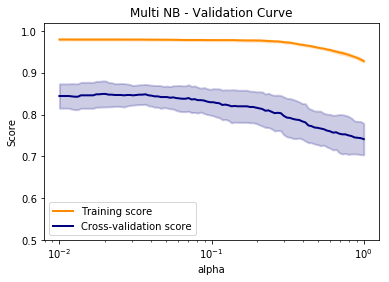

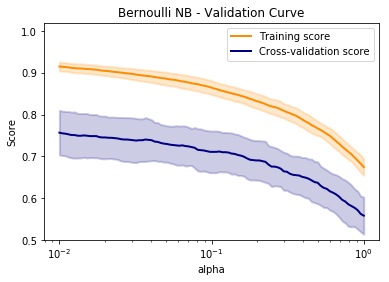

In [103]:
# Validation Curve call
alpha_list = np.logspace(-2,0,num=100)
plot_validation_curve(MultinomialNB(), "Multi NB - Validation Curve", x_train, y_train, "alpha", n_jobs=4, param_range=alpha_list)
plot_validation_curve(BernoulliNB(), "Bernoulli NB - Validation Curve", x_train, y_train, "alpha", n_jobs=4, param_range=alpha_list)

In [104]:
bnb = BernoulliNB(alpha=0.055908101825122229)

x_vectorized = TfidfVectorizer(sublinear_tf=True, max_df=0.6, stop_words=stop)
x_vectorized.fit(raw_data.Text)
x_train = x_vectorized.transform(raw_data.Text)
y_train = raw_data.Class

names = np.asarray(x_vectorized.get_feature_names())

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

bnb.fit(x_train, y_train)

BernoulliNB(alpha=0.0559081018251, binarize=0.0, class_prior=None,
      fit_prior=True)

In [105]:
tmp = pd.DataFrame(data=['Toda negativação ou protesto gera dano de difícil reparação, constituindo abuso e grave ameaça, abalando o prestígio creditício que gozava o Autor na Praça.'.lower()], columns=['Text'])
tmp = tmp['Text'].values
print(tmp)

x_tmp = x_vectorized.transform(tmp)

[ 'toda negativa\xc3\xa7\xc3\xa3o ou protesto gera dano de dif\xc3\xadcil repara\xc3\xa7\xc3\xa3o, constituindo abuso e grave amea\xc3\xa7a, abalando o prest\xc3\xadgio credit\xc3\xadcio que gozava o autor na pra\xc3\xa7a.']


In [106]:
bnb.predict(x_tmp)

array([3], dtype=int64)